In [32]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
jan24 = pd.read_csv('../data/jan24.csv')
jan24.head(2)

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_CITY_NAME,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2024,1,1,1,1/1/2024 12:00:00 AM,9E,N131EV,5225,ATL,"Atlanta, GA",...,61.0,48.0,33.0,1.0,164.0,NaN,NaN,NaN,NaN,NaN
1,2024,1,1,1,1/1/2024 12:00:00 AM,9E,N132EV,5115,DTW,"Detroit, MI",...,135.0,106.0,89.0,1.0,651.0,NaN,NaN,NaN,NaN,NaN


In [3]:
months = ["jan24", "feb24", "mar24", "apr24","may24", "jun24", 
          "jul24", "aug24","sep24", "oct24", "nov24", "dec24"]

df24 = pd.concat((pd.read_csv(f"../data/{m}.csv") for m in months),ignore_index=True)

C:\Users\divya\AppData\Local\Temp\ipykernel_17064\788946992.py:4: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df24 = pd.concat((pd.read_csv(f"../data/{m}.csv") for m in months),ignore_index=True)
C:\Users\divya\AppData\Local\Temp\ipykernel_17064\788946992.py:4: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df24 = pd.concat((pd.read_csv(f"../data/{m}.csv") for m in months),ignore_index=True)


In [4]:
df24.shape

(7079081, 42)

In [5]:
df24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7079081 entries, 0 to 7079080
Data columns (total 42 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY_OF_MONTH         int64  
 3   DAY_OF_WEEK          int64  
 4   FL_DATE              object 
 5   OP_UNIQUE_CARRIER    object 
 6   TAIL_NUM             object 
 7   OP_CARRIER_FL_NUM    float64
 8   ORIGIN               object 
 9   ORIGIN_CITY_NAME     object 
 10  ORIGIN_STATE_ABR     object 
 11  ORIGIN_STATE_NM      object 
 12  DEST                 object 
 13  DEST_CITY_NAME       object 
 14  DEST_STATE_ABR       object 
 15  DEST_STATE_NM        object 
 16  CRS_DEP_TIME         int64  
 17  DEP_TIME             float64
 18  DEP_DELAY            float64
 19  DEP_DELAY_NEW        float64
 20  DEP_TIME_BLK         object 
 21  TAXI_OUT             float64
 22  WHEELS_OFF           float64
 23  WHEELS_ON            float64
 24

In [6]:
df24['OP_UNIQUE_CARRIER'].value_counts()

OP_UNIQUE_CARRIER
WN    1419419
DL    1009194
AA     984306
UA     760451
OO     744658
YX     301465
MQ     279955
NK     261103
AS     245819
B6     240282
OH     227971
F9     208624
9E     200094
G4     117210
HA      78530
Name: count, dtype: int64

In [7]:
df24['MONTH'].value_counts()

MONTH
7     634613
8     619025
10    615497
6     611132
5     609743
3     591767
12    590581
9     582622
4     582205
11    575404
1     547271
2     519221
Name: count, dtype: int64

In [8]:
df24['FL_DATE'].value_counts()

FL_DATE
12/1/2024 12:00:00 AM     21764
10/11/2024 12:00:00 AM    21548
10/10/2024 12:00:00 AM    21539
10/14/2024 12:00:00 AM    21502
10/17/2024 12:00:00 AM    21496
                          ...  
1/27/2024 12:00:00 AM     15546
1/20/2024 12:00:00 AM     15535
2/3/2024 12:00:00 AM      15501
1/13/2024 12:00:00 AM     15483
11/28/2024 12:00:00 AM    11212
Name: count, Length: 366, dtype: int64

In [9]:
#convert to datetime
df24['FL_DATE'] = pd.to_datetime(df24['FL_DATE'],format='mixed')

In [10]:
df24['FL_DATE'].dtype

dtype('<M8[ns]')

In [11]:
df24['FL_DATE'] = df24['FL_DATE'].dt.date

In [12]:
df24.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_CITY_NAME,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2024,1,1,1,2024-01-01,9E,N131EV,5225.0,ATL,"Atlanta, GA",...,61.0,48.0,33.0,1.0,164.0,NaN,NaN,NaN,NaN,NaN
1,2024,1,1,1,2024-01-01,9E,N132EV,5115.0,DTW,"Detroit, MI",...,135.0,106.0,89.0,1.0,651.0,NaN,NaN,NaN,NaN,NaN
2,2024,1,1,1,2024-01-01,9E,N132EV,5414.0,DSM,"Des Moines, IA",...,111.0,108.0,87.0,1.0,533.0,NaN,NaN,NaN,NaN,NaN
3,2024,1,1,1,2024-01-01,9E,N133EV,5284.0,LGA,"New York, NY",...,150.0,129.0,103.0,1.0,722.0,NaN,NaN,NaN,NaN,NaN
4,2024,1,1,1,2024-01-01,9E,N133EV,5341.0,CHS,"Charleston, SC",...,118.0,104.0,83.0,1.0,641.0,NaN,NaN,NaN,NaN,NaN


In [13]:
df24['CANCELLED'].value_counts()

CANCELLED
0.0    6982766
1.0      96315
Name: count, dtype: int64

In [14]:
df24['OP_CARRIER_FL_NUM'] = df24['OP_CARRIER_FL_NUM'].astype('Int64')

In [15]:
df24['CANCELLED'] = df24['CANCELLED'].astype(int)
df24['DIVERTED'] = df24['DIVERTED'].astype(int)

In [16]:
df24['FLIGHT_STATUS'] = 'OPERATED'
df24.loc[df24['CANCELLED'] == 1, 'FLIGHT_STATUS'] = 'CANCELLED'
df24.loc[df24['DIVERTED'] == 1, 'FLIGHT_STATUS'] = 'DIVERTED'

In [17]:
df_delay = df24[df24['FLIGHT_STATUS'] == 'OPERATED']
#df_delay

In [18]:
df_cancel = df24[df24['FLIGHT_STATUS'] == 'CANCELLED']
#df_cancel

In [19]:
df_divert = df24[df24['FLIGHT_STATUS'] == 'DIVERTED']
#df_divert

##### Flights are categorized, Cancelled flights, Divereted flights  are excluded from delay analysis.

In [20]:
delay_columns = ['CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY']
df_delay[delay_columns] = df_delay[delay_columns].fillna(0)
df_delay

C:\Users\divya\AppData\Local\Temp\ipykernel_17064\3143203441.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delay[delay_columns] = df_delay[delay_columns].fillna(0)


,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_CITY_NAME,...,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FLIGHT_STATUS
0,2024,1,1,1,2024-01-01,9E,N131EV,5225,ATL,"Atlanta, GA",...,48.0,33.0,1.0,164.0,0.0,0.0,0.0,0.0,0.0,OPERATED
1,2024,1,1,1,2024-01-01,9E,N132EV,5115,DTW,"Detroit, MI",...,106.0,89.0,1.0,651.0,0.0,0.0,0.0,0.0,0.0,OPERATED
2,2024,1,1,1,2024-01-01,9E,N132EV,5414,DSM,"Des Moines, IA",...,108.0,87.0,1.0,533.0,0.0,0.0,0.0,0.0,0.0,OPERATED
3,2024,1,1,1,2024-01-01,9E,N133EV,5284,LGA,"New York, NY",...,129.0,103.0,1.0,722.0,0.0,0.0,0.0,0.0,0.0,OPERATED
4,2024,1,1,1,2024-01-01,9E,N133EV,5341,CHS,"Charleston, SC",...,104.0,83.0,1.0,641.0,0.0,0.0,0.0,0.0,0.0,OPERATED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7079076,2024,12,31,2,2024-12-31,YX,N880RW,5825,BUF,"Buffalo, NY",...,80.0,52.0,1.0,292.0,0.0,0.0,0.0,0.0,0.0,OPERATED
7079077,2024,12,31,2,2024-12-31,YX,N882RW,5754,GRR,"Grand Rapids, MI",...,119.0,90.0,1.0,618.0,0.0,0.0,0.0,0.0,0.0,OPERATED
7079078,2024,12,31,2,2024-12-31,YX,N882RW,5754,LGA,"New York, NY",...,123.0,98.0,1.0,618.0,0.0,0.0,0.0,0.0,0.0,OPERATED
7079079,2024,12,31,2,2024-12-31,YX,N882RW,5848,LGA,"New York, NY",...,76.0,47.0,1.0,269.0,0.0,0.0,0.0,0.0,0.0,OPERATED


In [21]:
# Seasonal Buckets
def get_season(m):
    if m in [12,1,2]:
        return 'Winter'
    elif m in [3,4,5]:
        return 'Spring'
    elif m in [6,7,8]:
        return 'Summer'
    else:
        return 'Fall'
df24['SEASON'] = df24['MONTH'].apply(get_season)

In [22]:
df_op = df24[df24['FLIGHT_STATUS'] == 'OPERATED']
df_op

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_CITY_NAME,...,AIR_TIME,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FLIGHT_STATUS,SEASON
0,2024,1,1,1,2024-01-01,9E,N131EV,5225,ATL,"Atlanta, GA",...,33.0,1.0,164.0,NaN,NaN,NaN,NaN,NaN,OPERATED,Winter
1,2024,1,1,1,2024-01-01,9E,N132EV,5115,DTW,"Detroit, MI",...,89.0,1.0,651.0,NaN,NaN,NaN,NaN,NaN,OPERATED,Winter
2,2024,1,1,1,2024-01-01,9E,N132EV,5414,DSM,"Des Moines, IA",...,87.0,1.0,533.0,NaN,NaN,NaN,NaN,NaN,OPERATED,Winter
3,2024,1,1,1,2024-01-01,9E,N133EV,5284,LGA,"New York, NY",...,103.0,1.0,722.0,NaN,NaN,NaN,NaN,NaN,OPERATED,Winter
4,2024,1,1,1,2024-01-01,9E,N133EV,5341,CHS,"Charleston, SC",...,83.0,1.0,641.0,NaN,NaN,NaN,NaN,NaN,OPERATED,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7079076,2024,12,31,2,2024-12-31,YX,N880RW,5825,BUF,"Buffalo, NY",...,52.0,1.0,292.0,NaN,NaN,NaN,NaN,NaN,OPERATED,Winter
7079077,2024,12,31,2,2024-12-31,YX,N882RW,5754,GRR,"Grand Rapids, MI",...,90.0,1.0,618.0,NaN,NaN,NaN,NaN,NaN,OPERATED,Winter
7079078,2024,12,31,2,2024-12-31,YX,N882RW,5754,LGA,"New York, NY",...,98.0,1.0,618.0,NaN,NaN,NaN,NaN,NaN,OPERATED,Winter
7079079,2024,12,31,2,2024-12-31,YX,N882RW,5848,LGA,"New York, NY",...,47.0,1.0,269.0,NaN,NaN,NaN,NaN,NaN,OPERATED,Winter


### “How often are flights delayed?”

In [23]:
df_op['delayed'] = df_op['ARR_DELAY'] > 15

C:\Users\divya\AppData\Local\Temp\ipykernel_17064\4101752280.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_op['delayed'] = df_op['ARR_DELAY'] > 15


In [24]:
#Monthly avg delay rate
monthly_delay_rate = (df_op.groupby(['YEAR','MONTH'])['delayed']
         .mean().reset_index(name='delay_rate'))
monthly_delay_rate

,YEAR,MONTH,delay_rate
0,2024,1,0.233184
1,2024,2,0.152908
2,2024,3,0.201735
3,2024,4,0.183974
4,2024,5,0.256726
5,2024,6,0.241965
6,2024,7,0.288699
7,2024,8,0.227919
8,2024,9,0.149036
9,2024,10,0.126513


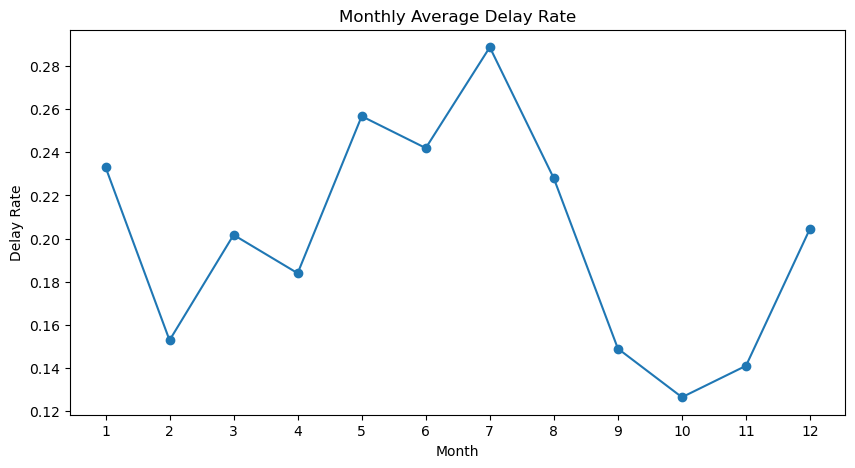

In [36]:
plt.figure(figsize=(10,5))

plt.plot(monthly_delay_rate['MONTH'],monthly_delay_rate['delay_rate'],marker='o')
plt.xlabel('Month')
plt.ylabel('Delay Rate')
plt.title('Monthly Average Delay Rate')
plt.xticks(range(1, 13))

plt.show()

In [25]:
#delay avg rate by airline
airline_delay_rate = (
    df_op.groupby('OP_UNIQUE_CARRIER')['delayed'].mean()
    .reset_index(name='delay_rate').sort_values('delay_rate'))
airline_delay_rate

,OP_UNIQUE_CARRIER,delay_rate
14,YX,0.135795
7,HA,0.145466
0,9E,0.153712
4,DL,0.166776
11,OO,0.184287
12,UA,0.192354
13,WN,0.198294
8,MQ,0.201546
6,G4,0.210703
10,OH,0.210937


In [26]:
#average delay minutes by airline
airline_avg_delay = (df_op.groupby('OP_UNIQUE_CARRIER')['ARR_DELAY']
         .mean().reset_index(name='avg_arr_delay'))
airline_avg_delay

,OP_UNIQUE_CARRIER,avg_arr_delay
0,9E,1.681912
1,AA,15.307916
2,AS,4.467858
3,B6,10.739642
4,DL,3.657075
5,F9,15.247771
6,G4,9.710381
7,HA,4.246661
8,MQ,6.457716
9,NK,8.415318


In [27]:
#cancellation
cancel_rate = (df24.groupby('OP_UNIQUE_CARRIER')['FLIGHT_STATUS']
         .apply(lambda x: (x == 'CANCELLED').mean()).reset_index(name='cancellation_rate'))
cancel_rate

,OP_UNIQUE_CARRIER,cancellation_rate
0,9E,0.023029
1,AA,0.015495
2,AS,0.019571
3,B6,0.015544
4,DL,0.009064
5,F9,0.023176
6,G4,0.017217
7,HA,0.010467
8,MQ,0.014234
9,NK,0.019142


In [28]:
delay_columns = ['CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY']

df_op[delay_columns] = df_op[delay_columns].fillna(0)

#delay by airlines
delay_causes = (df_op.groupby('OP_UNIQUE_CARRIER')[delay_columns].mean().reset_index())
delay_causes

C:\Users\divya\AppData\Local\Temp\ipykernel_17064\2452575443.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_op[delay_columns] = df_op[delay_columns].fillna(0)


,OP_UNIQUE_CARRIER,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,9E,3.901641,0.851952,2.849932,0.005357,5.043963
1,AA,7.371353,1.215471,2.915393,0.042114,10.857029
2,AS,3.224344,0.436741,2.982461,0.055725,4.453394
3,B6,7.900222,0.495755,4.000883,0.029739,7.649194
4,DL,5.896933,0.565469,2.316783,0.009549,3.633364
5,F9,6.000604,0.454197,3.975069,0.000000,12.388752
6,G4,6.715848,2.016339,3.457408,0.043453,6.996692
7,HA,4.188374,0.194247,0.221414,0.032718,2.501964
8,MQ,3.089264,1.488898,2.794956,0.021117,6.085541
9,NK,4.460430,0.443628,7.076536,0.088416,4.738301


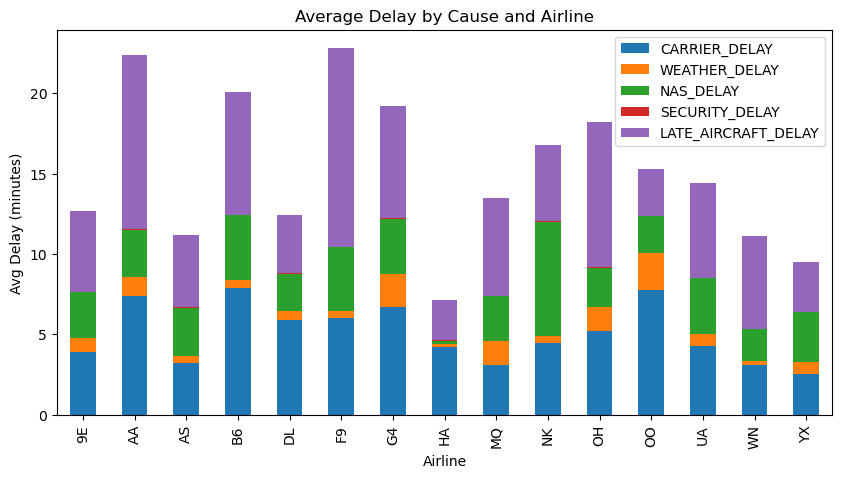

In [37]:
delay_causes.set_index('OP_UNIQUE_CARRIER').plot(kind='bar',stacked=True,figsize=(10,5))
plt.title('Average Delay by Cause and Airline')
plt.xlabel('Airline')
plt.ylabel('Avg Delay (minutes)')
plt.show()
